
        width < 10 : 34706
  10 <= width < 20 : 57250
  20 <= width < 30 : 24885
  30 <= width < 40 : 13338
  40 <= width < 50 : 8011
  50 <= width      : 20178
  

         width/height < 0.6 : 7720
  0.5 <= width/height < 0.7 : 22966
  0.7 <= width/height < 0.8 : 46997
  0.8 <= width/height < 0.9 : 45458
  0.9 <= width/height < 1.0 : 16786
  1.0 <= width/height       : 9341
  


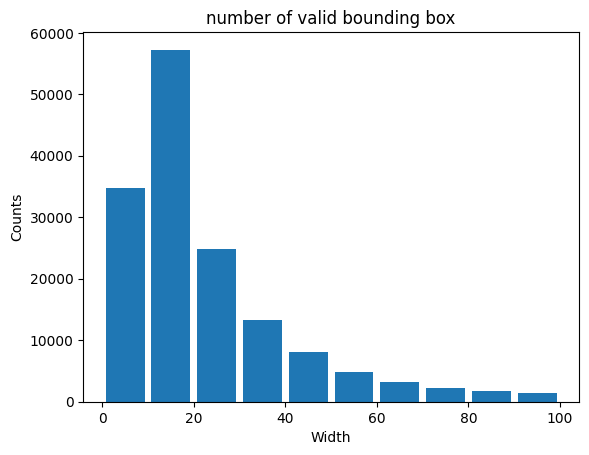

In [1]:
from itertools import count
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def extract_bbox(line):
  annotation = line.strip().split(" ")
  bbox_ls = np.reshape(np.array(annotation[1:]), [-1, 4])
  return bbox_ls

def get_width_asp_ratio(bbox_ls):
  width_ls = []
  asp_ratio_ls =[]
  for idx, bbox in enumerate(bbox_ls):
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    if not (x1>=0 and y1>=0 and x2>x1 and y2>y1): #check validate
      continue
    width, height = x2-x1+1, y2-y1+1
    width_ls.append(width)
    asp = width/ height
    asp_ratio_ls.append(asp)
  return width_ls, asp_ratio_ls

def get_info(width_ls, asp_ratio_ls):
  #width
  width_cond_ls = [10, 20, 30, 40, 50]
  num_cond1_width = sum(map(lambda x: x<width_cond_ls[0], width_ls))
  num_cond2_width = sum(map(lambda x: x<width_cond_ls[1] and x>=width_cond_ls[0], width_ls))
  num_cond3_width = sum(map(lambda x: x<width_cond_ls[2] and x>=width_cond_ls[1], width_ls))
  num_cond4_width = sum(map(lambda x: x<width_cond_ls[3] and x>=width_cond_ls[2], width_ls))
  num_cond5_width = sum(map(lambda x: x<width_cond_ls[4] and x>=width_cond_ls[3], width_ls))
  num_cond6_width = sum(map(lambda x: x>width_cond_ls[4], width_ls))
  num_cond_width = [num_cond1_width, num_cond2_width, num_cond3_width, num_cond4_width, num_cond5_width, num_cond6_width]
  #asp
  asp_cond_ls = [0.6, 0.7, 0.8, 0.9, 1.0]
  num_cond1_asp = sum(map(lambda x: x<asp_cond_ls[0], asp_ratio_ls))
  num_cond2_asp = sum(map(lambda x: x<asp_cond_ls[1] and x>=asp_cond_ls[0], asp_ratio_ls))
  num_cond3_asp = sum(map(lambda x: x<asp_cond_ls[2] and x>=asp_cond_ls[1], asp_ratio_ls))
  num_cond4_asp = sum(map(lambda x: x<asp_cond_ls[3] and x>=asp_cond_ls[2], asp_ratio_ls))
  num_cond5_asp = sum(map(lambda x: x<asp_cond_ls[4] and x>=asp_cond_ls[3], asp_ratio_ls))
  num_cond6_asp = sum(map(lambda x: x>asp_cond_ls[4], asp_ratio_ls))
  num_cond_asp = [num_cond1_asp, num_cond2_asp, num_cond3_asp, num_cond4_asp, num_cond5_asp, num_cond6_asp]
  return num_cond_width, num_cond_asp

def display_info(total_num_cond_width, total_num_cond_asp):
  # display width
  display_text = f"""
        width < 10 : {int(total_num_cond_width[0])}
  10 <= width < 20 : {int(total_num_cond_width[1])}
  20 <= width < 30 : {int(total_num_cond_width[2])}
  30 <= width < 40 : {int(total_num_cond_width[3])}
  40 <= width < 50 : {int(total_num_cond_width[4])}
  50 <= width      : {int(total_num_cond_width[5])}
  """
  print(display_text)
  # display asp_ratio
  display_text = f"""
         width/height < 0.6 : {int(total_num_cond_asp[0])}
  0.5 <= width/height < 0.7 : {int(total_num_cond_asp[1])}
  0.7 <= width/height < 0.8 : {int(total_num_cond_asp[2])}
  0.8 <= width/height < 0.9 : {int(total_num_cond_asp[3])}
  0.9 <= width/height < 1.0 : {int(total_num_cond_asp[4])}
  1.0 <= width/height       : {int(total_num_cond_asp[5])}
  """
  print(display_text)

def plot_histogram(widt):
  pass


if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
  # Enter your code here (25%)
  total_num_cond_width = np.zeros((6))
  total_num_cond_asp = np.zeros((6))
  all_valid_width_ls = np.array([])
  for line in lines:
    bboxs = extract_bbox(line)
    width_ls, asp_ls = get_width_asp_ratio(bboxs)
    all_valid_width_ls = np.hstack((all_valid_width_ls, np.array(width_ls)))
    num_cond_width, num_cond_asp = get_info(width_ls, asp_ls)
    total_num_cond_width = np.add(total_num_cond_width, np.array(num_cond_width))
    total_num_cond_asp = np.add(total_num_cond_asp, np.array(num_cond_asp))
  display_info(total_num_cond_width, total_num_cond_asp)
  plt.figure()
  plt.hist(all_valid_width_ls, range(0, 101, 10), rwidth=0.85)
  plt.xlabel("Width")
  plt.ylabel("Counts")
  plt.title("number of valid bounding box")
  plt.show()

In [2]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.
def count_invalid(bbox_ls):
  invalid_bbox_num = 0
  for idx, bbox in enumerate(bbox_ls):
    x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    if not (x1>=0 and y1>=0 and x2>x1 and y2>y1): #check validate
      invalid_bbox_num += 1
      continue
  return invalid_bbox_num

if __name__ == "__main__":
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
  total_invalid_num = 0
  for line in lines:
    bbox = extract_bbox(line)
    invalid_num = count_invalid(bbox)
    total_invalid_num = total_invalid_num + invalid_num
  print(f"Invalid Bounding Box number : {total_invalid_num}")
  pass

Invalid Bounding Box number : 535
